In [1]:
from hmmlearn import hmm
import numpy as np
from sklearn.mixture.gmm import _validate_covars
import pandas as pd
from sklearn.preprocessing import scale,MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# 【各不相同】

# 读取数据设定隐态数量与制定指数名称
stock_data = pd.read_csv('C:/Users/jxjsj/Desktop/JupyterHome/Data/SZZS080101-181101.csv',index_col=0)
data1 = pd.read_csv('C:/Users/jxjsj/Desktop/JupyterHome/Data/SZZS_lnr_rv_w_m_ntd_080101-181101.csv',index_col=0)
n_components = 2
index_data_name = 'SZZS'

In [3]:
# 【各不相同】

# 抽取特征向量合并为一个数据框
open_p = stock_data['open'][500:]
close_p = stock_data['close'][500:]
volume = stock_data['volume'][500:]
money = stock_data['money'][500:]
RV = data1['szzsRV'][499:]
RVsqrt = pd.DataFrame(np.sqrt(data1['szzsRV'][499:]))
RVsqrt.columns=['RVsqrt']
ln_r = pd.DataFrame(np.log(stock_data['close'][499:]) - np.log(stock_data['close'][499:].shift(1))).dropna(how='any',axis=0)
ln_r.columns = ['lnR']
X = pd.concat([open_p,close_p,volume,money,RV,RVsqrt,ln_r],axis=1)
# X = pd.concat([RVsqrt,ln_r],axis=1)
# X = pd.concat([RVsqrt,ln_r],axis=1)
# 结果 X 一定是一个类似特征向量矩阵的数据框

In [4]:
# 【完全相同】

# 数据预处理-标准化
# for x in X.columns:
#     X[x] = scale(X[x])

# 数据预处理-归一化
for x in X.columns:
    min_max = MinMaxScaler()
    X[x] = min_max.fit_transform(np.array(X[x]).reshape(-1,1))

In [5]:
# 【完全相同】

# 训练HMM模型
model = hmm.GaussianHMM(n_components=n_components, n_iter=10000, tol=1e-9,covariance_type="full")
model.fit(X)
decode = model.decode(X)

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
# 【各不相同】

# 设定隐态数量
H = pd.DataFrame(decode[1])
H.columns=['Hidden']
H.index=X.index
X_H = pd.concat([X,H],axis=1)
# 三个隐态
X_H['clour'] = X_H['Hidden'].apply(lambda x: {0:'r',1:'g',2:'b'}[x])
# 二个隐态
# X_H['clour'] = X_H['Hidden'].apply(lambda x: {0:'r',1:'g'}[x])

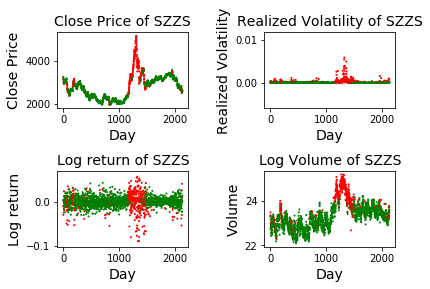

In [7]:
# 【完全相同】

fig = plt.figure(1)

# 绘图 - 收盘价与市场风格
plt.subplot(221)
plt.scatter(range(len(X.index)),list(close_p), c=list(X_H['clour']),s=1)
 
# 设置图表标题并给坐标轴加上标签
plt.title('Close Price of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Close Price', fontsize=14)

# plt.show()

# 绘图 - 已实现波动率与市场风格
plt.subplot(222)
plt.scatter(range(len(X.index)),list(RV), c=list(X_H['clour']),s=1)

# 设置图表标题并给坐标轴加上标签
plt.title('Realized Volatility of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Realized Volatility', fontsize=14)

# plt.show()

# 绘图 - 对数收益率与市场风格
plt.subplot(223)
plt.scatter(range(len(X.index)),ln_r, c=list(X_H['clour']),s=1)

# 设置图表标题并给坐标轴加上标签
plt.title('Log return of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Log return', fontsize=14)

# plt.show()

# 绘图 - 交易量与市场风格
plt.subplot(224)
plt.scatter(range(len(X.index)),np.log(volume), c=list(X_H['clour']),s=1)

# 设置图表标题并给坐标轴加上标签
plt.title('Log Volume of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Volume', fontsize=14)

fig.tight_layout()
plt.show()

In [8]:
# # 【完全相同】-废弃

# # 风格转变要求天数以及比例，例如该天往后day天中有大于prop*day为同一风格
# state_change_day = 256
# state_change_prop = 0.95

# date_lst =  list(X_H.index)
# state_lst = list(X_H['Hidden'])

# state_change_lst= []
# n_of_state = 0
# for state in state_lst[:-state_change_day]:
    
#     # 风格转变判定，自然要求该天与前一天风格不一样
#     try:
#         if state_lst[n_of_state-1] == state or state_lst[n_of_state-2] == state or state_lst[n_of_state-3] == state:
#             n_of_state += 1
#             continue
#     except:
#         pass
    
#     count_same = 0
#     for state_behind in state_lst[n_of_state+1:n_of_state+state_change_day+1]:
#         if state_behind == state:
#             count_same += 1
#     if count_same >= state_change_day*state_change_prop:
#         state_change_lst.append(date_lst[n_of_state])
#     n_of_state += 1
# state_change_lst

In [9]:
# 【完全相同】

# 风格转变要求天数以及比例，例如该天往后day天中有大于prop*day为同一风格
state_change_day = 256
state_change_prop = 0.88

date_lst =  list(X_H.index)
state_lst = list(X_H['Hidden'])

state_change_lst= []
n_of_state = 0
for state in state_lst[:-state_change_day]:
    
    # 风格转变判定，自然要求该天与前N天风格大致不一样，但和后N天风格大致一样
    count_diff = 0
    for state_forward in state_lst[n_of_state-state_change_day-1:n_of_state]:
        if state_forward != state:
            count_diff += 1
    if count_diff >= state_change_day*state_change_prop:
        pass
    else:
        n_of_state += 1
        continue
    
    count_same = 0
    for state_behind in state_lst[n_of_state+1:n_of_state+state_change_day+1]:
        if state_behind == state:
            count_same += 1
    if count_same >= state_change_day*state_change_prop:
        state_change_lst.append(date_lst[n_of_state])
    n_of_state += 1
state_change_lst

['2014-10-30',
 '2014-10-31',
 '2014-11-03',
 '2014-11-04',
 '2014-11-05',
 '2014-11-07',
 '2014-11-10',
 '2014-11-11',
 '2014-11-12',
 '2014-11-13',
 '2014-11-24',
 '2014-11-25',
 '2014-11-26',
 '2014-11-27',
 '2014-11-28',
 '2014-12-01',
 '2014-12-02',
 '2014-12-03',
 '2014-12-04',
 '2014-12-05',
 '2014-12-08',
 '2014-12-09',
 '2014-12-10',
 '2014-12-11',
 '2014-12-12',
 '2014-12-15',
 '2014-12-16',
 '2014-12-17',
 '2014-12-18',
 '2014-12-19',
 '2014-12-22',
 '2016-02-02',
 '2016-02-04',
 '2016-02-05',
 '2016-02-16',
 '2016-02-17',
 '2016-02-18',
 '2016-03-14',
 '2016-03-15',
 '2016-03-16']

In [34]:
# 【完全相同】

# 用高斯混合聚类（与高斯混合隐马尔科夫模型非常相似）来划分市场风格
# 高斯混合聚类判别每个点属于哪一类依据为 argmax(i)(该点来自成分i的概率：来自i/来自每一个)，实际上就是近似算法，详见统计学习方法p184与西瓜书p208

from sklearn.mixture import GaussianMixture
szzsCluster = GaussianMixture(n_components=2, 
                              covariance_type='full', 
                              tol=0.001, 
                              reg_covar=1e-06, 
                              max_iter=1000, 
                              n_init=1, 
                              init_params='kmeans', 
                              weights_init=None, 
                              means_init=None, 
                              precisions_init=None, 
                              random_state=1, 
                              warm_start=False, 
                              verbose=0, 
                              verbose_interval=10)
szzsCluster.fit(X)
H_cluster = pd.DataFrame(szzsCluster.predict(X))
H_cluster.columns=['Hidden_C']
H_cluster['Hidden_C'].apply(lambda x: {0:'r',1:'g',2:'b',3:'y'}[x])

0       r
1       r
2       g
3       r
4       g
5       r
6       g
7       g
8       r
9       r
10      g
11      r
12      g
13      r
14      g
15      r
16      r
17      r
18      r
19      r
20      r
21      r
22      r
23      r
24      r
25      r
26      r
27      r
28      r
29      r
       ..
2106    r
2107    r
2108    r
2109    r
2110    r
2111    r
2112    r
2113    r
2114    r
2115    r
2116    r
2117    g
2118    r
2119    r
2120    g
2121    g
2122    r
2123    r
2124    g
2125    g
2126    g
2127    g
2128    r
2129    r
2130    g
2131    r
2132    r
2133    r
2134    r
2135    r
Name: Hidden_C, Length: 2136, dtype: object

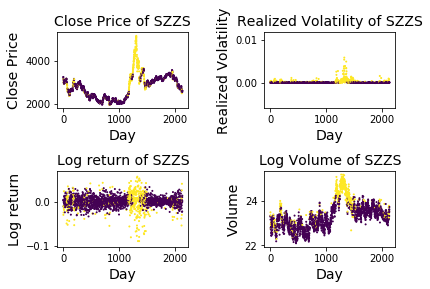

In [36]:
# 【完全相同】

# 高斯混合聚类的划分图

fig = plt.figure(1)

# 绘图 - 收盘价与市场风格
plt.subplot(221)
plt.scatter(range(len(X.index)),list(close_p), c=list(H_cluster['Hidden_C']),s=1)
 
# 设置图表标题并给坐标轴加上标签
plt.title('Close Price of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Close Price', fontsize=14)

# plt.show()

# 绘图 - 已实现波动率与市场风格
plt.subplot(222)
plt.scatter(range(len(X.index)),list(RV), c=list(H_cluster['Hidden_C']),s=1)

# 设置图表标题并给坐标轴加上标签
plt.title('Realized Volatility of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Realized Volatility', fontsize=14)

# plt.show()

# 绘图 - 对数收益率与市场风格
plt.subplot(223)
plt.scatter(range(len(X.index)),ln_r, c=list(H_cluster['Hidden_C']),s=1)

# 设置图表标题并给坐标轴加上标签
plt.title('Log return of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Log return', fontsize=14)

# plt.show()

# 绘图 - 交易量与市场风格
plt.subplot(224)
plt.scatter(range(len(X.index)),np.log(volume), c=list(H_cluster['Hidden_C']),s=1)

# 设置图表标题并给坐标轴加上标签
plt.title('Log Volume of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Volume', fontsize=14)

fig.tight_layout()
plt.show()

In [37]:
# 【完全相同】

# 高斯混合聚类的划分点

# 风格转变要求天数以及比例，例如该天往后day天中有大于prop*day为同一风格
state_change_day = 256
state_change_prop = 0.83

date_lst =  list(X_H.index)
state_lst = list(H_cluster['Hidden_C'])

state_change_lst= []
n_of_state = 0
for state in state_lst[:-state_change_day]:
    
    # 风格转变判定，自然要求该天与前N天风格大致不一样，但和后N天风格大致一样
    count_diff = 0
    for state_forward in state_lst[n_of_state-state_change_day-1:n_of_state]:
        if state_forward != state:
            count_diff += 1
    if count_diff >= state_change_day*state_change_prop:
        pass
    else:
        n_of_state += 1
        continue
    
    count_same = 0
    for state_behind in state_lst[n_of_state+1:n_of_state+state_change_day+1]:
        if state_behind == state:
            count_same += 1
    if count_same >= state_change_day*state_change_prop:
        state_change_lst.append(date_lst[n_of_state])
    n_of_state += 1
state_change_lst

['2014-10-30',
 '2014-10-31',
 '2014-11-03',
 '2014-11-04',
 '2014-11-05',
 '2014-11-07',
 '2014-11-10',
 '2014-11-11',
 '2014-11-24',
 '2014-11-27',
 '2014-11-28',
 '2014-12-01',
 '2014-12-02',
 '2014-12-03',
 '2014-12-04',
 '2014-12-05',
 '2014-12-08',
 '2014-12-09',
 '2014-12-10',
 '2014-12-11',
 '2014-12-12',
 '2014-12-15',
 '2014-12-16',
 '2014-12-17',
 '2014-12-18',
 '2014-12-19',
 '2014-12-22',
 '2014-12-23',
 '2014-12-24',
 '2014-12-25',
 '2014-12-26',
 '2014-12-29',
 '2014-12-30',
 '2014-12-31',
 '2015-01-05',
 '2015-01-06',
 '2015-01-07',
 '2015-01-08',
 '2015-01-09',
 '2015-01-12',
 '2015-01-15',
 '2015-01-16',
 '2016-01-20',
 '2016-01-25',
 '2016-02-02',
 '2016-02-04',
 '2016-02-05',
 '2016-02-16',
 '2016-02-17',
 '2016-03-14',
 '2016-03-15']